In [63]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
np.set_printoptions(threshold=np.nan)

df = pd.read_csv("precos_casa_california.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [64]:
cols = df.columns[0:9]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') #converte para numéricos

sem_na = df.dropna(axis="rows") #dropa as linhas vazias

sem_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [65]:
#conversão da distância em números inteiros
sem_na = sem_na.replace('INLAND', 0)
sem_na = sem_na.replace('<1H OCEAN', 1)
sem_na = sem_na.replace('NEAR BAY', 2)
sem_na = sem_na.replace('NEAR OCEAN', 3)
sem_na = sem_na.replace('ISLAND', 4)
sem_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,2


In [66]:
#converte em número
cols = sem_na.columns
sem_na[cols] = sem_na[cols].apply(pd.to_numeric, errors='coerce')

#dropa as vaizas
sem_na = sem_na.dropna(axis="rows")

#dropa as colunas que não serão usadas
sem_na = sem_na.drop(columns=['latitude', 'longitude'])

sem_na.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.0
2,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2.0
3,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2.0
4,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2.0
5,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19203 entries, 0 to 20444
Data columns (total 8 columns):
housing_median_age    19203 non-null float64
total_rooms           19203 non-null float64
total_bedrooms        19203 non-null float64
population            19203 non-null float64
households            19203 non-null float64
median_income         19203 non-null float64
median_house_value    19203 non-null float64
ocean_proximity       19203 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


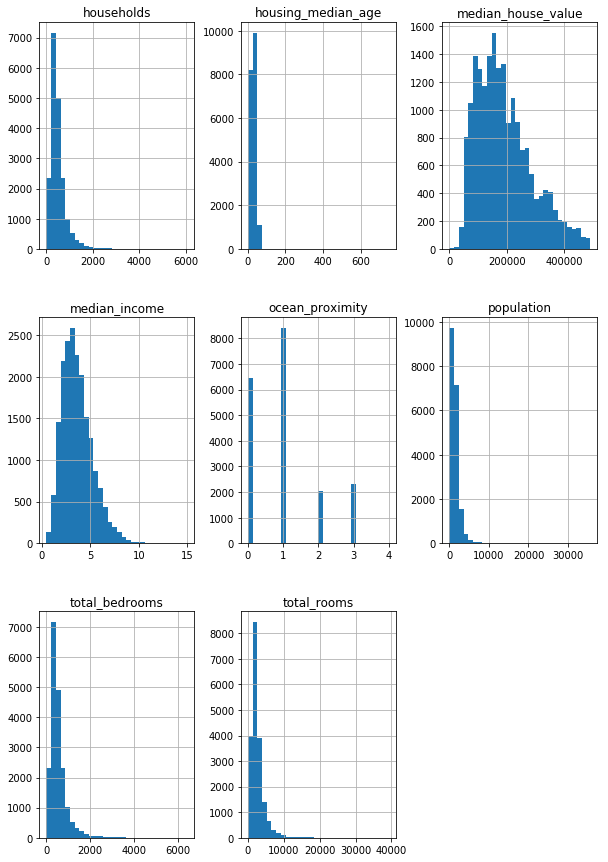

In [67]:
#limpando os outliers
cleanCols = sem_na.columns[6:7]
for i in cleanCols:
  sem_na = sem_na.loc[sem_na[i] < sem_na[i].quantile(0.95)]
sem_na.info()


%matplotlib inline
import matplotlib.pyplot as plt
sem_na.hist(bins=30, figsize=(10,15))
plt.show()

In [68]:
#tira o valor das casas para criar a variável de treino
treino = sem_na.drop(columns=['median_house_value'])

treino.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,2.0
2,52.0,2535.0,489.0,1094.0,514.0,3.6591,2.0
3,52.0,3104.0,687.0,1157.0,647.0,3.1200,2.0
4,42.0,2555.0,665.0,1206.0,595.0,2.0804,2.0
5,52.0,3549.0,707.0,1551.0,714.0,3.6912,2.0


In [69]:
x = treino
y = sem_na['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=7)

# Cria o linear regression object
regr = GradientBoostingRegressor()

# Treina o modelo
model = regr.fit(x_train, y_train)

# score
score = model.score(x_test, y_test)
print('Score: ' + str(int(score*100)) + '%' )

Score: 66%
